<a href="https://colab.research.google.com/github/Forkyknight/linear-regression/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4
0.8305772042874674
0.884298052962873
0.6857249750648227
0.8716249095994848
0.78190547701534
0.8976030461288977
0.8529579819953387
0.7784586967472695
0.7696390266456388
0.8331719416917458
0.6842836894511952
0.9170593675922524
0.8243107895986124
0.8647999859601339
0.8691519589990571
0.840678449126801
0.7835389121176995
0.7697420623122186
0.8331923001923178
0.8021972237126563
0.8964720702413699
0.7543512773592015
0.8868534315886168
0.7900036583002668
0.9078652321559942
0.7985602266814148
0.862643556553605
0.8170325473784705
0.7309150768403654
0.7880437753606092
0.7705292179774704
0.7669297412888008
0.841555280169429
0.7852569870440694
0.8524802523083457
0.845130024671135
0.7957727978675523
0.8934896443655356
0.8578625075032

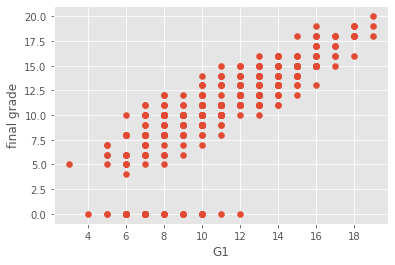

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import style
from matplotlib import pyplot
import sklearn
import pickle
from sklearn import linear_model

data=pd.read_csv("student-mat.csv", sep=";")
data=data[["G1","G2","G3","studytime","failures","absences"]]
predict="G3"
print(data.head())
x=np.array(data.drop([predict],1))
y=np.array(data[predict])
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.1)
best=0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)
    if acc>best:
        best=acc
        with open("student_model.pickle","wb") as f:
            pickle.dump(linear,f)
pickle_in=open("student_model.pickle", "rb")
linear=pickle.load(pickle_in)
predictions=linear.predict(x_test)
print('coefficients of feature \n',linear.coef_)
print('intercet \n',linear.intercept_)
for x in range(len(predictions)):
    print('my prediction:',predictions[x],'actual result:',y_test[x])
p="G1"
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("final grade")
pyplot.show()

